In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("C:\Saunak\customer_retention_dataset.xlsx")

In [3]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [4]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
df.shape

(269, 71)

In [6]:
df.rename(columns={"1Gender of respondent":'gender'})



,gender,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


# Checking null values:

In [7]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

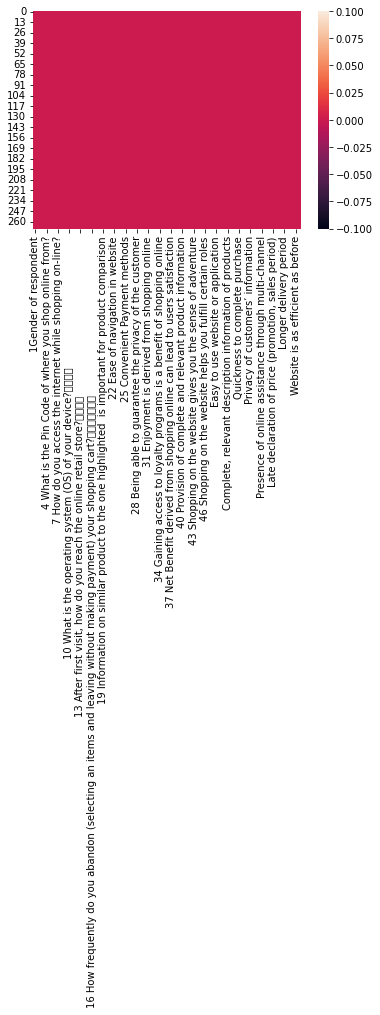

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())

So here no null values are  present

# Describing:

In [9]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


# Target varriables:

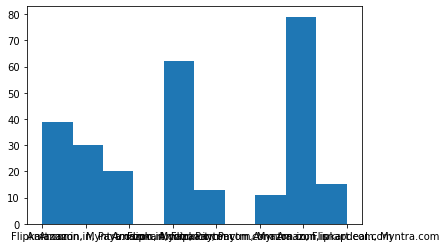

In [10]:
df["Which of the Indian online retailer would you recommend to a friend?"].hist(grid=False)
plt.show()

# Target column is not balanced

# Label Encoding

# Lable Encoding===>Alphabatical order

In [11]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [12]:
df["Which of the Indian online retailer would you recommend to a friend?"]=Le.fit_transform(df["Which of the Indian online retailer would you recommend to a friend?"])

In [13]:
Le.inverse_transform([0,1,2,3,4,5,6,7])

array(['Amazon.in', 'Amazon.in, Flipkart.com',
       'Amazon.in, Flipkart.com, Myntra.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com', 'Amazon.in, Paytm.com, Myntra.com',
       'Flipkart.com',
       'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'], dtype=object)

In [14]:
df["Which of the Indian online retailer would you recommend to a friend?"].value_counts()

0    79
1    62
6    39
3    30
5    20
2    15
4    13
7    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

# Checking correlation:

In [15]:
df.corr()

,4 What is the Pin Code of where you shop online from?,Which of the Indian online retailer would you recommend to a friend?
4 What is the Pin Code of where you shop online from?,1.000000,-0.045388
Which of the Indian online retailer would you recommend to a friend?,-0.045388,1.000000


# Let's check distribution among al the columns

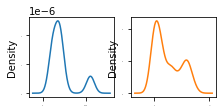

In [16]:
df.plot(kind='density',subplots=True,layout=(7,10),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

skewness and outlayrs are present

# Visualization method

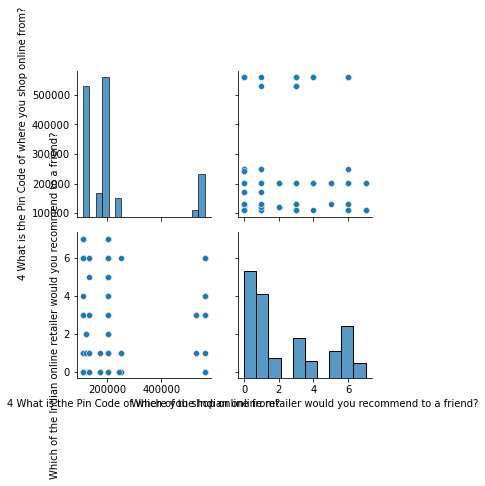

In [17]:
sns.pairplot(df)

# outlayer checking

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [19]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

ValueError: num must be 1 <= num <= 12, not 13

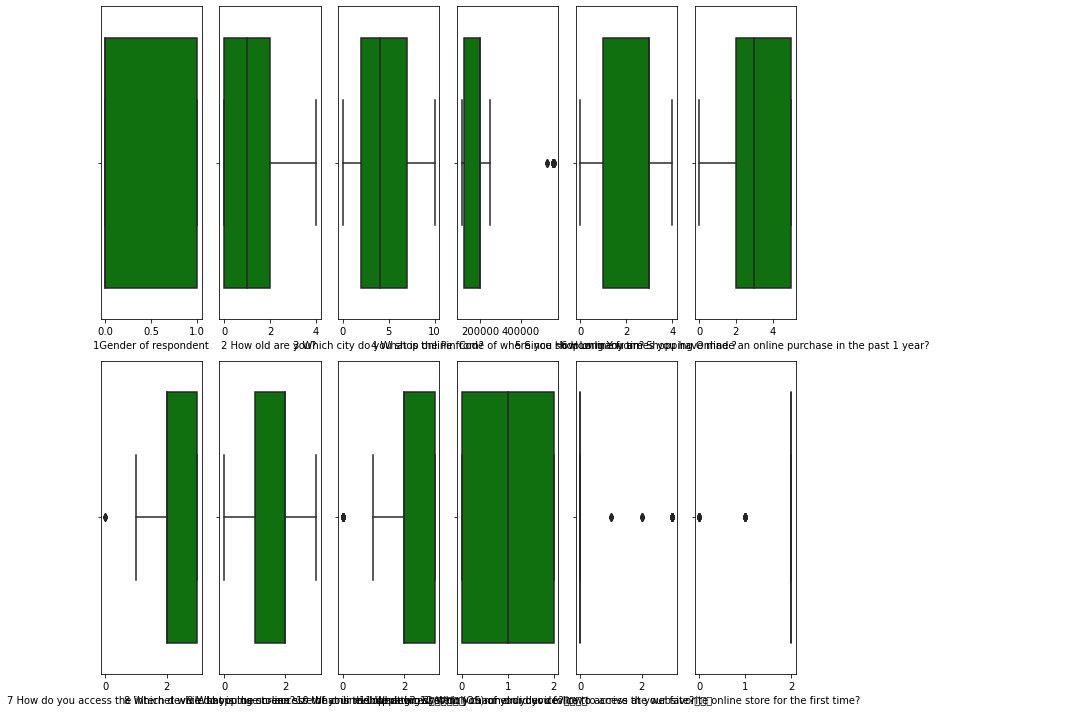

In [20]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,10))
for i in range(0, len(colist)):
    plt.subplot(2,6,graph)
    sns.boxplot(df[colist[i]],color='green',orient='h')
    graph+=1
    plt.tight_layout()

# Here some outlayers are present

In [21]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(269, 71)

In [22]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([  4,  16,  20,  30,  35,  49,  79,  88,  95, 112, 116, 133, 142,
       159, 162, 196, 207, 234, 237, 262], dtype=int64), array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11], dtype=int64))


In [24]:
len(np.where(z>3)[0])

20

In [25]:
z.iloc[4]

1Gender of respondent                                                   0.697272
2 How old are you?                                                      1.126343
3 Which city do you shop online from?                                   1.412561
4 What is the Pin Code of where you shop online from?                   2.207300
5 Since How Long You are Shopping Online ?                              1.127113
                                                                          ...   
Longer delivery period                                                  0.153218
Change in website/Application design                                    1.019284
Frequent disruption when moving from one page to another                1.336753
Website is as efficient as before                                       1.784121
Which of the Indian online retailer would you recommend to a friend?    0.255334
Name: 4, Length: 71, dtype: float64

In [26]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,1,1,2,110009,3,2,0,0,3,2,...,0,0,3,5,0,3,2,0,0,6
1,0,0,2,110030,3,3,3,2,0,1,...,1,6,7,10,7,5,0,4,1,3
2,0,0,4,201308,2,3,1,2,2,0,...,7,6,4,7,0,3,5,6,0,5
3,1,0,6,132001,2,5,1,2,2,1,...,9,7,4,8,5,3,1,1,2,1
5,0,1,9,201308,3,3,3,2,2,0,...,6,3,2,2,2,1,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,0,10,173212,0,5,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
265,0,1,3,201008,0,2,1,2,3,0,...,4,4,3,5,3,1,2,2,4,6
266,0,2,0,560010,1,5,2,1,3,2,...,0,9,0,10,7,5,6,7,0,0
267,0,4,10,173229,1,5,3,2,2,0,...,0,2,0,4,0,0,0,5,5,0


In [27]:
df_new_z.shape

(249, 71)

In [28]:
df.shape

(269, 71)

# Data loss percentage:

In [29]:
(269-249)/269*100

7.434944237918216

# after  outlayer removal 7.4% data are removed

# Skewness

In [30]:
df.skew()

1Gender of respondent                                                   0.741028
2 How old are you?                                                      0.680987
3 Which city do you shop online from?                                   0.313729
4 What is the Pin Code of where you shop online from?                   1.748322
5 Since How Long You are Shopping Online ?                             -0.276968
                                                                          ...   
Longer delivery period                                                 -0.147702
Change in website/Application design                                    0.354163
Frequent disruption when moving from one page to another               -0.100608
Website is as efficient as before                                       0.662084
Which of the Indian online retailer would you recommend to a friend?    0.583614
Length: 71, dtype: float64

In [31]:
x=df_new_z.iloc[:,:-1]
#target
y=df_new_z.iloc[:,-1]

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [33]:
x

array([[ 1.42708982, -0.15346873, -0.80787619, ...,  0.13781299,
        -1.46220623, -1.14044446],
       [-0.70072674, -1.37612872, -0.80787619, ..., -1.22491078,
         0.32605469, -0.08484615],
       [-0.70072674, -1.37612872, -0.07892817, ...,  1.13659767,
         1.00486503, -1.14044446],
       ...,
       [-0.70072674,  0.65271935, -1.83632223, ...,  1.37500012,
         1.31880971, -1.14044446],
       [-0.70072674,  1.77587749,  1.52386542, ..., -1.22491078,
         0.67516569,  1.33556796],
       [-0.70072674,  0.65271935, -0.42210019, ..., -1.22491078,
        -1.46220623, -1.14044446]])

In [34]:
x.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

# So now skewness has been removed

In [35]:
features=df.drop("Which of the Indian online retailer would you recommend to a friend?",axis=1)
target=df["Which of the Indian online retailer would you recommend to a friend?"]

In [36]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state{i},the training accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 1.0
At random state0,the training accuracy is :- 1.0


At random state1,the training accuracy is :- 1.0
At random state1,the training accuracy is :- 1.0


At random state2,the training accuracy is :- 1.0
At random state2,the training accuracy is :- 1.0


At random state3,the training accuracy is :- 1.0
At random state3,the training accuracy is :- 1.0


At random state4,the training accuracy is :- 1.0
At random state4,the training accuracy is :- 1.0


At random state5,the training accuracy is :- 1.0
At random state5,the training accuracy is :- 1.0


At random state6,the training accuracy is :- 1.0
At random state6,the training accuracy is :- 1.0


At random state7,the training accuracy is :- 1.0
At random state7,the training accuracy is :- 1.0


At random state8,the training accuracy is :- 1.0
At random state8,the training accuracy is :- 1.0


At random state9,the training accuracy is :- 1.0
At random state9,the training accuracy is :- 1.0




At random state86,the training accuracy is :- 1.0
At random state86,the training accuracy is :- 1.0


At random state87,the training accuracy is :- 1.0
At random state87,the training accuracy is :- 1.0


At random state88,the training accuracy is :- 1.0
At random state88,the training accuracy is :- 1.0


At random state89,the training accuracy is :- 1.0
At random state89,the training accuracy is :- 1.0


At random state90,the training accuracy is :- 1.0
At random state90,the training accuracy is :- 1.0


At random state91,the training accuracy is :- 1.0
At random state91,the training accuracy is :- 1.0


At random state92,the training accuracy is :- 1.0
At random state92,the training accuracy is :- 1.0


At random state93,the training accuracy is :- 1.0
At random state93,the training accuracy is :- 1.0


At random state94,the training accuracy is :- 1.0
At random state94,the training accuracy is :- 1.0


At random state95,the training accuracy is :- 1.0
At random state95,the training a

In [39]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [40]:
lr.fit(features_train,target_train)

LinearRegression()

In [41]:
pred_test=lr.predict(features_test)

In [42]:
print(r2_score(target_test,pred_test))

1.0


# CV

In [43]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cross score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing{Test_accuracy}")
    print("\n")

at cross fold2 the cross score is 0.9997188088686028 and accuracy score for training is -0.8445080509221727 and accuracy score for testing1.0


at cross fold3 the cross score is 0.9997057053108812 and accuracy score for training is -0.8445080509221727 and accuracy score for testing1.0


at cross fold4 the cross score is 0.9997044601694804 and accuracy score for training is -0.8445080509221727 and accuracy score for testing1.0


at cross fold5 the cross score is 0.9997008230026656 and accuracy score for training is -0.8445080509221727 and accuracy score for testing1.0


at cross fold6 the cross score is 0.9997033926881184 and accuracy score for training is -0.8445080509221727 and accuracy score for testing1.0


at cross fold7 the cross score is 0.9996955345204256 and accuracy score for training is -0.8445080509221727 and accuracy score for testing1.0


at cross fold8 the cross score is 0.9996871700840848 and accuracy score for training is -0.8445080509221727 and accuracy score for testi

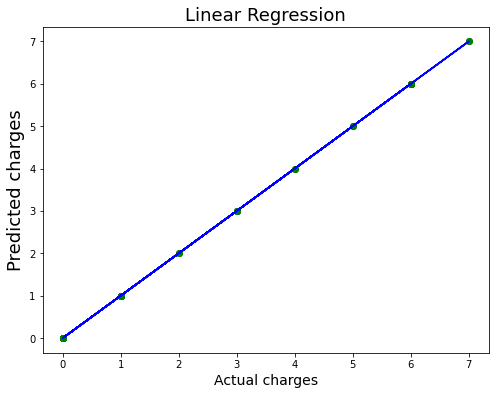

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='g')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,10],'random_state':list(range(0,10))}

In [47]:
ls=Lasso()
clif=GridSearchCV(ls,parameters)
clif.fit(features_train,target_train)
print(clif.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [48]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.5150612852744683

In [49]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6139053615027071

# Ensamble method

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
parameters={'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]}
rf=RandomForestRegressor
clf=GridSearchCV(estimator, parameters, n_jobs=-1, cv=5)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}


In [52]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print("R2 score:",rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross_val_score:",rfc*100)

R2 score: 99.99552193454453
Cross_val_score: 99.99392047211317


In [53]:
# We are getting accuracy and cross validation both as 99% which shows model performing very well